In [1]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.6 MB/s eta 0:00:00


In [2]:
import numpy as np
import networkx as nx

In [3]:
f1 = open('COX2_A.txt')
A = []
for line in f1:
  a = line[:-1].replace(" ","")
  b = a.split(",")
  c = [int(i) for i in b]
  A.append(c)
f1.close()
print(A)

[[2, 1], [5, 1], [19, 1], [1, 2], [3, 2], [7, 2], [2, 3], [4, 3], [6, 3], [3, 4], [5, 4], [24, 4], [1, 5], [4, 5], [25, 5], [3, 6], [8, 6], [12, 6], [2, 7], [13, 7], [17, 7], [6, 8], [9, 8], [26, 8], [8, 9], [10, 9], [27, 9], [9, 10], [11, 10], [20, 10], [10, 11], [12, 11], [28, 11], [6, 12], [11, 12], [29, 12], [7, 13], [14, 13], [30, 13], [13, 14], [15, 14], [31, 14], [14, 15], [16, 15], [18, 15], [15, 16], [17, 16], [32, 16], [7, 17], [16, 17], [33, 17], [15, 18], [1, 19], [34, 19], [35, 19], [36, 19], [10, 20], [21, 20], [22, 20], [23, 20], [20, 21], [20, 22], [20, 23], [37, 23], [38, 23], [39, 23], [4, 24], [5, 25], [8, 26], [9, 27], [11, 28], [12, 29], [13, 30], [14, 31], [16, 32], [17, 33], [19, 34], [19, 35], [19, 36], [23, 37], [23, 38], [23, 39], [41, 40], [44, 40], [46, 40], [40, 41], [42, 41], [45, 41], [41, 42], [43, 42], [62, 42], [42, 43], [44, 43], [63, 43], [40, 44], [43, 44], [64, 44], [41, 45], [47, 45], [51, 45], [40, 46], [52, 46], [56, 46], [45, 47], [48, 47], [65

In [4]:
f2 = open('COX2_graph_indicator.txt')
graph_indicator = []
for line in f2:
  a = line[:-1].replace(" ","")
  graph_indicator.append(int(a))
f2.close()
print(graph_indicator)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 

In [5]:
f3 = open('COX2_graph_labels.txt')
graph_labels = []
for line in f3:
  a = line[:-1].replace(" ","")
  graph_labels.append(int(a))
f3.close()
print(graph_labels)

[-1, -1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1, -1, -1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, -1, -1, -1, -1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, -1, -1, 1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, 1, -1, 

In [6]:
f4 = open('COX2_node_attributes.txt')
node_attributes = []
for line in f4:
  a = line[:-1].replace(" ","")
  b = a.split(",")
  c = [float(i) for i in b]
  node_attributes.append(c)
f4.close()
print(node_attributes)

[[3.355228, 0.143395, 1.083854], [2.090028, 0.200695, 0.491354], [1.188228, -0.454505, 1.342654], [1.902628, -0.921605, 2.434354], [3.244428, -0.536105, 2.281354], [-0.267772, -0.529905, 1.167754], [1.782528, 0.785495, -0.777046], [-0.939372, 0.369895, 0.327054], [-2.327872, 0.303795, 0.179254], [-3.052272, -0.656005, 0.890254], [-2.398972, -1.556705, 1.734554], [-1.009972, -1.485405, 1.877054], [2.019628, 2.148795, -1.004646], [1.712828, 2.714995, -2.244546], [1.173728, 1.920995, -3.249446], [0.932228, 0.569095, -3.039446], [1.234928, -0.002705, -1.801346], [0.881228, 2.467395, -4.437046], [4.615628, 0.647395, 0.462054], [-4.817072, -0.751205, 0.691054], [-5.308572, 0.588195, 0.382454], [-5.362572, -1.439205, 1.857054], [-5.024072, -1.781705, -0.736946], [1.481028, -1.461505, 3.275154], [4.060128, -0.749205, 2.963654], [-0.386872, 1.132895, -0.219446], [-2.828972, 1.006595, -0.482946], [-2.954272, -2.310605, 2.288254], [-0.509472, -2.189005, 2.541054], [2.398128, 2.799195, -0.220146],

In [7]:
f5 = open('COX2_node_labels.txt')
node_labels = []
for line in f5:
  a = line[:-1].replace(" ","")
  node_labels.append(int(a))
f5.close()
print(node_labels)

[6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 9, 6, 16, 8, 8, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 9, 16, 8, 8, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 16, 8, 8, 6, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 16, 8, 8, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 16, 8, 8, 6, 6, 9, 9, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 16, 8, 8, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 16, 8, 8, 6, 6, 8, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 16, 8, 8, 6, 9, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6

In [8]:
graph_nodes = {}
for i in range(1,468):
  graph_nodes[i] = []
for i in range(len(graph_indicator)):
  graph_nodes[graph_indicator[i]].append(i+1)
print(graph_nodes)

{1: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39], 2: [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75], 3: [76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111], 4: [112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150], 5: [151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192], 6: [193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216

In [9]:
graph_edges = {}
for i in range(1,468):
  graph_edges[i] = []
for i in A:
  for j in range(1,468):
    if i[0] in graph_nodes[j] and i[1] in graph_nodes[j]:
      graph_edges[j].append(i)
      break
print(graph_edges)

{1: [[2, 1], [5, 1], [19, 1], [1, 2], [3, 2], [7, 2], [2, 3], [4, 3], [6, 3], [3, 4], [5, 4], [24, 4], [1, 5], [4, 5], [25, 5], [3, 6], [8, 6], [12, 6], [2, 7], [13, 7], [17, 7], [6, 8], [9, 8], [26, 8], [8, 9], [10, 9], [27, 9], [9, 10], [11, 10], [20, 10], [10, 11], [12, 11], [28, 11], [6, 12], [11, 12], [29, 12], [7, 13], [14, 13], [30, 13], [13, 14], [15, 14], [31, 14], [14, 15], [16, 15], [18, 15], [15, 16], [17, 16], [32, 16], [7, 17], [16, 17], [33, 17], [15, 18], [1, 19], [34, 19], [35, 19], [36, 19], [10, 20], [21, 20], [22, 20], [23, 20], [20, 21], [20, 22], [20, 23], [37, 23], [38, 23], [39, 23], [4, 24], [5, 25], [8, 26], [9, 27], [11, 28], [12, 29], [13, 30], [14, 31], [16, 32], [17, 33], [19, 34], [19, 35], [19, 36], [23, 37], [23, 38], [23, 39]], 2: [[41, 40], [44, 40], [46, 40], [40, 41], [42, 41], [45, 41], [41, 42], [43, 42], [62, 42], [42, 43], [44, 43], [63, 43], [40, 44], [43, 44], [64, 44], [41, 45], [47, 45], [51, 45], [40, 46], [52, 46], [56, 46], [45, 47], [48,

In [10]:
graphs = []
for i in range(1,468):
  G = nx.Graph()
  G.add_nodes_from(graph_nodes[i])
  G.add_edges_from(graph_edges[i])
  graphs.append(G)

In [11]:
for i in range(1,468):
  low = graph_nodes[i][0] - 1
  for j in range(len(graph_nodes[i])):
    graph_nodes[i][j] = graph_nodes[i][j] - low
  for k in range(len(graph_edges[i])):
    graph_edges[i][k][0] = graph_edges[i][k][0] - low
    graph_edges[i][k][1] = graph_edges[i][k][1] - low

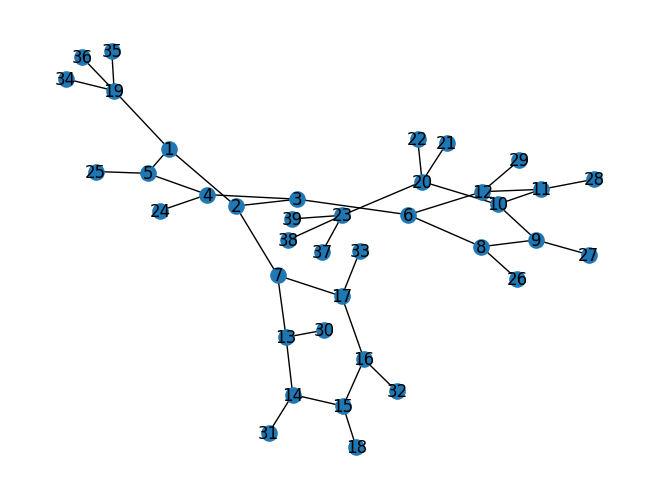

In [12]:
nx.draw(graphs[0], node_size = 120, width = 1, with_labels = True)

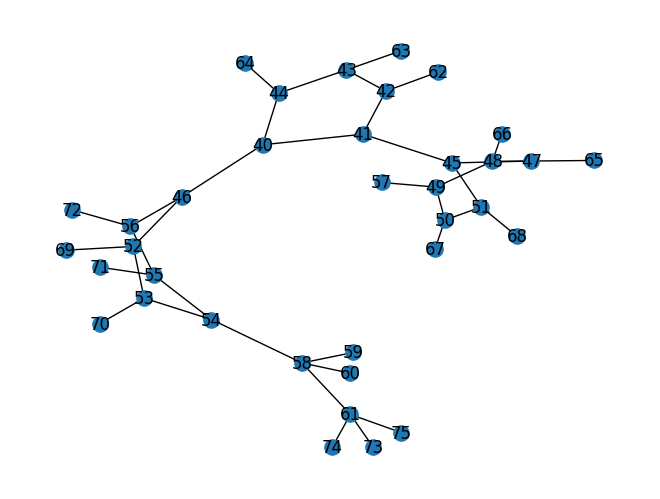

In [13]:
nx.draw(graphs[1], node_size = 120, width = 1, with_labels = True)

In [ ]:
import torch
import torch.nn as nn
import networkx as nx
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data, DataLoader
from torch_geometric.utils import from_networkx
import random

embedding_dim = 64

# Define a Graph Convolutional Network (GCN) model
class GCN(nn.Module):
    def __init__(self, in_features, out_features):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_features, 128)
        self.conv2 = GCNConv(128, out_features)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        return x

# Function to convert a NetworkX graph to PyTorch Geometric Data
def nx_to_torch_geometric(graph):
    data = from_networkx(graph)
    data.x = torch.eye(graph.number_of_nodes(), dtype=torch.float)
    return data

# Function to embed the graph using the GCN model
def embed_graph(graph, gcn_model):
    data = nx_to_torch_geometric(graph)
    return gcn_model(data)

# Function to extract k-hop neighborhoods
def extract_neighborhood(graph, node, k=2):
    return nx.ego_graph(graph, node, radius=k)

# Function to mine frequent subgraphs across multiple graphs
def frequent_subgraph_mining(graphs, gcn_model, support_threshold=2, k=2):
    subgraph_embeddings = []

    # Extract and embed subgraphs from all graphs
    for graph in graphs:
        for node in graph.nodes():
            subgraph = extract_neighborhood(graph, node, k=k)
            # Get the number of nodes in the subgraph
            num_nodes_subgraph = subgraph.number_of_nodes()
            # Create a new GCN model with the correct input features for the subgraph
            subgraph_gcn_model = GCN(in_features=num_nodes_subgraph, out_features=64)
            embedding = embed_graph(subgraph, subgraph_gcn_model)  # Use the subgraph-specific model
            # Reshape or pad the embeddings to a fixed size
            embedding = torch.nn.functional.pad(embedding, (0, 0, 0, embedding_dim - embedding.shape[0])) # Pad embeddings to match the specified embedding_dim
            subgraph_embeddings.append(embedding)

    # Find frequent subgraphs based on embeddings
    frequent_subgraphs = []
    for i, emb1 in enumerate(subgraph_embeddings):
        count = 0
        for j, emb2 in enumerate(subgraph_embeddings):
            if i != j and torch.allclose(emb1, emb2, atol=0.1):  # Compare embeddings
                count += 1
        if count >= support_threshold:
            frequent_subgraphs.append(emb1)

    return frequent_subgraphs

# Function to create a synthetic dataset of multiple undirected graphs
def create_graph_dataset(num_graphs, num_nodes=10):
    dataset = []
    for _ in range(num_graphs):
        G = nx.gnm_random_graph(num_nodes, random.randint(num_nodes, num_nodes * 2))  # Create random undirected graph
        dataset.append(G)
    return dataset

# Main function to run frequent subgraph mining
def main():
    # Initialize the GCN model
    gcn_model = GCN(in_features=10, out_features=64)  # Feature size matches the node number

    # Perform frequent subgraph mining
    frequent_subgraphs = frequent_subgraph_mining(graphs, gcn_model, support_threshold=2, k=2)

    print(f"Found {len(frequent_subgraphs)} frequent subgraphs.")
    for subgraph in frequent_subgraphs:
        print(subgraph)

if __name__ == "__main__":
    main()
